In [1]:
#TODO:
#Variance for each column
#Correlation with output variable for each column
#Distribution of each column
#Convert to Normal Dist(QQ Plot)
#Binning of columns
#1-level, 2-level features for categorical variables
#distnace=speed*time

In [ ]:
#Observations
#match_id has more variance and 0 null in comparision to match_event_id 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ronaldo_data=pd.read_csv(r'..\data.csv')

In [3]:
ronaldo_data.shape

(30697, 28)

# EDA

In [601]:
ronaldo_data.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [602]:
ronaldo_data.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

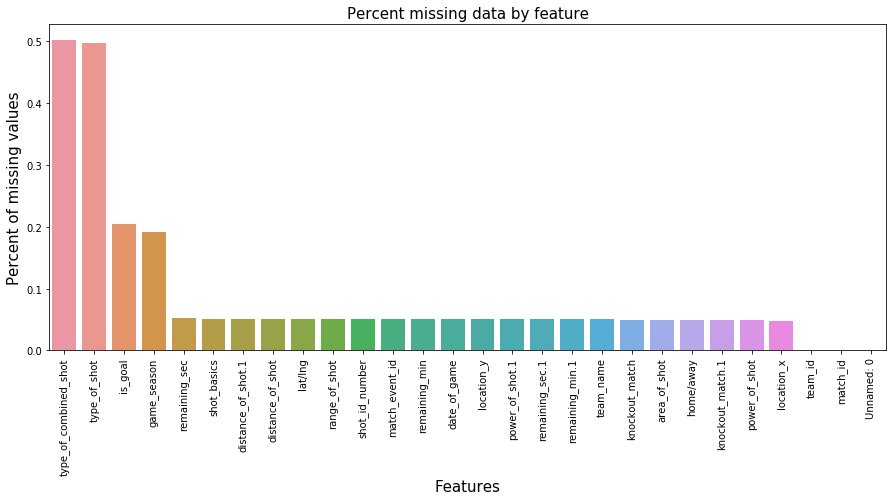

In [603]:
total = ronaldo_data.isnull().sum().sort_values(ascending=False)
percent = (ronaldo_data.isnull().sum()/ronaldo_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

plt.show()

# missing_data

In [9]:
import pandas_profiling

#visualising different columns in our dataset

#we can uncomment this command to have details about each and 
#every column of the dataset and overall dataset.

pandas_profiling.ProfileReport(ronaldo_data)

Number of variables,28
Number of observations,30697
Total Missing (%),8.4%
Total size in memory,6.6 MiB
Average record size in memory,224.0 B
Numeric,14
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,4


# Preprocessing

In [4]:
ronaldo_data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
#Merge columns methods:
def compare_values(a,b, type_cols):
    if (type_cols=='N'):
        if (pd.isnull(a) and pd.isnull(b)):
            return np.nan
        elif ((pd.isnull(a) or ~a.is_integer()) and b.is_integer()):
            return b
        elif ((pd.isnull(b) or ~b.is_integer()) and a.is_integer()):
            return a
        elif(a.is_integer() and b.is_integer()):
            return a
        else:
            return np.nan
    else:
        if (pd.isnull(a) and pd.isnull(b)):
            return np.nan
        else:
            return a if (not pd.isnull(a)) else b

def merge_columns(dataframe, column_1, column_2, type_cols):
    
    dataframe[column_1+'_merged'] = dataframe[[column_1, column_2]].apply(lambda x: compare_values(x[column_1], x[column_2], type_cols), axis=1)
    
    dataframe.drop([column_1, column_2], inplace=True, axis=1)
    return dataframe

In [6]:
ronaldo_data_preprocessed = merge_columns(ronaldo_data.copy(), 'power_of_shot', 'power_of_shot.1', 'N')

In [7]:
ronaldo_data_preprocessed = merge_columns(ronaldo_data_preprocessed.copy(), 'knockout_match', 'knockout_match.1', 'N')

In [8]:
ronaldo_data_preprocessed = merge_columns(ronaldo_data_preprocessed.copy(), 'remaining_min', 'remaining_min.1', 'N')

In [9]:
ronaldo_data_preprocessed = merge_columns(ronaldo_data_preprocessed.copy(), 'remaining_sec', 'remaining_sec.1', 'N')

In [10]:
ronaldo_data_preprocessed = merge_columns(ronaldo_data_preprocessed.copy(), 'distance_of_shot', 'distance_of_shot.1', 'N')

In [11]:
ronaldo_data_preprocessed = merge_columns(ronaldo_data_preprocessed.copy(), 'type_of_shot', 'type_of_combined_shot', 'C')

In [12]:
print(len(ronaldo_data.columns))
ronaldo_data.columns

27


Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [13]:
print(len(ronaldo_data_preprocessed.columns))
ronaldo_data_preprocessed.columns

21


Index(['match_event_id', 'location_x', 'location_y', 'game_season', 'is_goal',
       'area_of_shot', 'shot_basics', 'range_of_shot', 'team_name',
       'date_of_game', 'home/away', 'shot_id_number', 'lat/lng', 'match_id',
       'team_id', 'power_of_shot_merged', 'knockout_match_merged',
       'remaining_min_merged', 'remaining_sec_merged',
       'distance_of_shot_merged', 'type_of_shot_merged'],
      dtype='object')

In [14]:
useful_columns = ['game_season', 'is_goal',
       'area_of_shot', 'shot_basics', 'range_of_shot',
       'home/away', 'shot_id_number', 'match_id',
       'power_of_shot_merged', 'knockout_match_merged', 'remaining_min_merged',
       'remaining_sec_merged', 'distance_of_shot_merged', 'type_of_shot_merged']

In [15]:
ronaldo_data_preprocessed['date_of_game'] = pd.to_datetime(ronaldo_data_preprocessed['date_of_game'])

In [16]:
def extract_game_season():
    ronaldo_data_preprocessed['date_of_game_year'] = ronaldo_data_preprocessed['date_of_game'].dt.year
    ronaldo_data_preprocessed['game_season'] = ronaldo_data_preprocessed[['game_season', 'date_of_game_year']].apply(lambda x:str(str(int(x['date_of_game_year']))+"-"+str(int(x['date_of_game_year'])+1)[-2:]) if (pd.isnull(x['game_season']) and not pd.isnull(x['date_of_game_year'])) else x['game_season'], axis=1)
    ronaldo_data_preprocessed.drop(['date_of_game_year'], inplace=True, axis=1)

In [17]:
extract_game_season()

**Imputation**

In [18]:
#Imputing shot_id_number
ronaldo_data_preprocessed['shot_id_number'] = list(range(int(ronaldo_data_preprocessed.shot_id_number.min()), int(ronaldo_data_preprocessed.shot_id_number.max()+1)))

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ronaldo_data_preprocessed['range_of_shot'].fillna('ffill', inplace=True)
ronaldo_data_preprocessed['range_of_shot_encoded'] = le.fit_transform(ronaldo_data_preprocessed['range_of_shot'])

In [680]:
# ronaldo_data_preprocessed['game_season'].fillna(ronaldo_data_preprocessed['game_season'].mode()[0], inplace=True)

In [683]:
# ronaldo_data_preprocessed['Opposition'].fillna(ronaldo_data_preprocessed['Opposition'].mode()[0], inplace=True)

In [688]:
# ronaldo_data_preprocessed['area_of_shot'].fillna(ronaldo_data_preprocessed['area_of_shot'].mode()[0], inplace=True)

In [689]:
# ronaldo_data_preprocessed['area_of_shot'].isna().sum()

0

# Feature Engineering

In [20]:
useful_columns = ['match_id', 'game_season', 'Opposition', 'Goal_Per_Team','Goal_Per_Season','Goal_Per_Type_Shot','Goal_Per_Area_Shot',
                'Goal_Per_Shot_Basics', 'Game_Season_Match_Id_2_Level','Opposition_Area_of_Shot_2_Level','Opposition_Shot_Basics_2_Level',
                'Opposition_Type_of_Shot_2_Level', 'Power_Type_of_Shot_2_Level', 'Power_Shot_Basics_2_Level', 'Power_Area_of_Shot_2_Level',
                'range_of_shot_encoded', 'Remaining_Time', 'location_x','location_y',
                'area_of_shot', 'shot_basics', 'range_of_shot',
                'power_of_shot_merged', 'knockout_match_merged', 'remaining_min_merged',
                'remaining_sec_merged', 'distance_of_shot_merged', 'type_of_shot_merged', 'shot_id_number','is_goal']

In [21]:
feature_cols = ['Opposition', 'Goal_Per_Team', 'Goal_Per_Season', 'Goal_Per_Type_Shot', 'Goal_Per_Area_Shot', 'Goal_Per_Shot_Basics', 'Game_Season_Match_Id_2_Level', 'Opposition_Type_of_Shot_2_Level','Opposition_Area_of_Shot_2_Level', 'Opposition_Shot_Basics_2_Level', 'Power_Type_of_Shot_2_Level', 'Power_Shot_Basics_2_Level', 'Power_Area_of_Shot_2_Level', 'range_of_shot_encoded', 'Remaining_Time', 'location_x', 'location_y']

In [22]:
#Creating new feature 'Opposition' from home/away column
def split_func(x):
    if (pd.isnull(x)):
        return np.nan
    if ('vs.' in x):
        return x.split(sep='vs.')[1].strip()
    if ('@' in x):
        return x.split(sep='@')[1].strip()
        
ronaldo_data_preprocessed['Opposition'] = ronaldo_data_preprocessed['home/away'].apply(lambda x: split_func(x))

In [783]:
# len(ronaldo_data_train[(ronaldo_data_train.shot_basics=='Goal Area') & (ronaldo_data_train.is_goal==1)])/len(ronaldo_data_train[(ronaldo_data_train.shot_basics=='Goal Area')])

In [29]:
#Creating new feature 'Goal_Per_Team' 
def goal_percentage_per_team(series):
    return series.sum()/len(series)
    
temp_df = ronaldo_data_train.groupby(by='Opposition', as_index=False).agg({'is_goal':goal_percentage_per_team})
dictionary_team = dict(zip(temp_df.Opposition.tolist(), temp_df.is_goal.tolist()))
ronaldo_data_preprocessed['Goal_Per_Team'] = ronaldo_data_preprocessed.Opposition.apply(lambda x:np.nan if pd.isnull(x) else dictionary_team[x])

In [30]:
#Creating new feature 'Goal_Per_Season' 
def goal_percentage_per_season(series):
    return series.sum()/len(series)
    
temp_df = ronaldo_data_train.groupby(by='game_season', as_index=False).agg({'is_goal':goal_percentage_per_season})
dictionary_season = dict(zip(temp_df.game_season.tolist(), temp_df.is_goal.tolist()))
ronaldo_data_preprocessed['Goal_Per_Season'] = ronaldo_data_preprocessed.game_season.apply(lambda x:np.nan if pd.isnull(x) else dictionary_season[x])

In [31]:
#Creating new feature 'Goal_Per_Type_Shot' 
def goal_percentage_per_type_of_shot(series):
    return series.sum()/len(series)
    
temp_df = ronaldo_data_train.groupby(by='type_of_shot_merged', as_index=False).agg({'is_goal':goal_percentage_per_type_of_shot})
dictionary_type_of_shot = dict(zip(temp_df.type_of_shot_merged.tolist(), temp_df.is_goal.tolist()))
ronaldo_data_preprocessed['Goal_Per_Type_Shot'] = ronaldo_data_preprocessed.type_of_shot_merged.apply(lambda x:np.nan if pd.isnull(x) else dictionary_type_of_shot[x])

In [32]:
#Creating new feature 'Goal_Per_Area_Shot' 
def goal_percentage_per_area_of_shot(series):
    return series.sum()/len(series)
    
temp_df = ronaldo_data_train.groupby(by='area_of_shot', as_index=False).agg({'is_goal':goal_percentage_per_area_of_shot})
dictionary_area_of_shot = dict(zip(temp_df.area_of_shot.tolist(), temp_df.is_goal.tolist()))
ronaldo_data_preprocessed['Goal_Per_Area_Shot'] = ronaldo_data_preprocessed.area_of_shot.apply(lambda x:np.nan if pd.isnull(x) else dictionary_area_of_shot[x])

In [33]:
#Creating new feature 'Goal_Per_Shot_Basics' 
def goal_percentage_per_shot_basics(series):
    return series.sum()/len(series)
    
temp_df = ronaldo_data_train.groupby(by='shot_basics', as_index=False).agg({'is_goal':goal_percentage_per_shot_basics})
dictionary_shot_basics = dict(zip(temp_df.shot_basics.tolist(), temp_df.is_goal.tolist()))
ronaldo_data_preprocessed['Goal_Per_Shot_Basics'] = ronaldo_data_preprocessed.shot_basics.apply(lambda x:np.nan if pd.isnull(x) else dictionary_shot_basics[x])

In [34]:
#Creating new feature 'Remaining_Time'
def remaining_time(a,b):
    if (pd.isnull(a) and pd.isnull(b)):
        return np.nan
    if (pd.isnull(a) and not pd.isnull(b)):
        return b
    if (not pd.isnull(a) and pd.isnull(b)):
        return a*60
    if (not pd.isnull(a) and not pd.isnull(b)):
        return (a*60)+b
    
ronaldo_data_preprocessed['Remaining_Time'] =  ronaldo_data_preprocessed[['remaining_min_merged','remaining_sec_merged']].apply(lambda x: remaining_time(x['remaining_min_merged'], x['remaining_sec_merged']), axis=1)  

In [35]:
# ronaldo_data_preprocessed[useful_columns].head()

In [36]:
ronaldo_data_preprocessed.shape

(30697, 29)

**2-Level Features**

In [37]:
def generic_percentage(series):
    return series.sum()/len(series)

In [38]:
#temp_df

In [39]:
#2-Level feature for 'Game_Season_Match_Id_2_Level'
temp_df = ronaldo_data_train.groupby(by=['game_season','match_id'], as_index=False).agg({'is_goal':generic_percentage})
temp_df.columns = ['game_season', 'match_id', 'Game_Season_Match_Id_2_Level']
ronaldo_data_preprocessed = ronaldo_data_preprocessed.merge(temp_df,on = ['game_season', 'match_id'], how='left')

In [40]:
#2-Level feature for 'Opposition_Area_of_Shot_2_Level'
temp_df = ronaldo_data_train.groupby(by=['Opposition','area_of_shot'], as_index=False).agg({'is_goal':generic_percentage})
temp_df.columns = ['Opposition', 'area_of_shot', 'Opposition_Area_of_Shot_2_Level']
ronaldo_data_preprocessed = ronaldo_data_preprocessed.merge(temp_df,on = ['Opposition', 'area_of_shot'], how='left')

In [41]:
#2-Level feature for 'Opposition_Shot_Basics_2_Level'
temp_df = ronaldo_data_train.groupby(by=['Opposition','shot_basics'], as_index=False).agg({'is_goal':generic_percentage})
temp_df.columns = ['Opposition', 'shot_basics', 'Opposition_Shot_Basics_2_Level']
ronaldo_data_preprocessed = ronaldo_data_preprocessed.merge(temp_df,on = ['Opposition', 'shot_basics'], how='left')

In [42]:
#2-Level feature for 'Opposition_Type_of_Shot_2_Level'
temp_df = ronaldo_data_train.groupby(by=['Opposition','type_of_shot_merged'], as_index=False).agg({'is_goal':generic_percentage})
temp_df.columns = ['Opposition', 'type_of_shot_merged', 'Opposition_Type_of_Shot_2_Level']
ronaldo_data_preprocessed = ronaldo_data_preprocessed.merge(temp_df,on = ['Opposition', 'type_of_shot_merged'], how='left')

In [43]:
#2-Level feature for 'Power_Area_of_Shot_2_Level'
temp_df = ronaldo_data_train.groupby(by=['power_of_shot_merged','area_of_shot'], as_index=False).agg({'is_goal':generic_percentage})
temp_df.columns = ['power_of_shot_merged', 'area_of_shot', 'Power_Area_of_Shot_2_Level']
ronaldo_data_preprocessed = ronaldo_data_preprocessed.merge(temp_df,on = ['power_of_shot_merged', 'area_of_shot'], how='left')

In [44]:
#2-Level feature for 'Power_Shot_Basics_2_Level'
temp_df = ronaldo_data_train.groupby(by=['power_of_shot_merged','shot_basics'], as_index=False).agg({'is_goal':generic_percentage})
temp_df.columns = ['power_of_shot_merged', 'shot_basics', 'Power_Shot_Basics_2_Level']
ronaldo_data_preprocessed = ronaldo_data_preprocessed.merge(temp_df,on = ['power_of_shot_merged', 'shot_basics'], how='left')

In [45]:
#2-Level feature for 'Power_Type_of_Shot_2_Level'
temp_df = ronaldo_data_train.groupby(by=['power_of_shot_merged','type_of_shot_merged'], as_index=False).agg({'is_goal':generic_percentage})
temp_df.columns = ['power_of_shot_merged', 'type_of_shot_merged', 'Power_Type_of_Shot_2_Level']
ronaldo_data_preprocessed = ronaldo_data_preprocessed.merge(temp_df,on = ['power_of_shot_merged', 'type_of_shot_merged'], how='left')

In [46]:
ronaldo_data_preprocessed[feature_cols].head()

,Opposition,Goal_Per_Team,Goal_Per_Season,Goal_Per_Type_Shot,Goal_Per_Area_Shot,Goal_Per_Shot_Basics,Game_Season_Match_Id_2_Level,Opposition_Type_of_Shot_2_Level,Opposition_Area_of_Shot_2_Level,Opposition_Shot_Basics_2_Level,Power_Type_of_Shot_2_Level,Power_Shot_Basics_2_Level,Power_Area_of_Shot_2_Level,range_of_shot_encoded,Remaining_Time,location_x,location_y
0,POR,0.468883,0.462046,0.275000,0.396975,0.406092,0.444444,0.125000,0.450980,0.458904,0.333333,0.427982,0.437052,0,627.0,167.0,72.0
1,POR,0.468883,0.462046,0.311475,0.392556,0.406092,0.444444,0.142857,0.418033,0.458904,0.212121,0.427982,0.416901,2,622.0,-157.0,0.0
2,NaN,NaN,0.462046,0.267241,0.363576,0.406092,0.444444,NaN,NaN,NaN,0.206897,0.427982,0.385135,0,465.0,-101.0,135.0
3,POR,0.468883,0.462046,0.392126,0.382743,0.406092,0.444444,0.392936,0.400000,0.458904,0.406494,0.427982,0.395089,0,412.0,138.0,175.0
4,POR,0.468883,0.462046,0.814353,0.524320,0.618073,0.444444,0.807692,0.548583,0.643678,0.804054,0.623853,0.534334,4,19.0,0.0,0.0


In [53]:
feature_cols.append('is_goal')

In [739]:
test = ronaldo_data_train[feature_cols[1:]].copy()
test.fillna(method='ffill', inplace=True)

In [740]:
test.shape

(24429, 13)

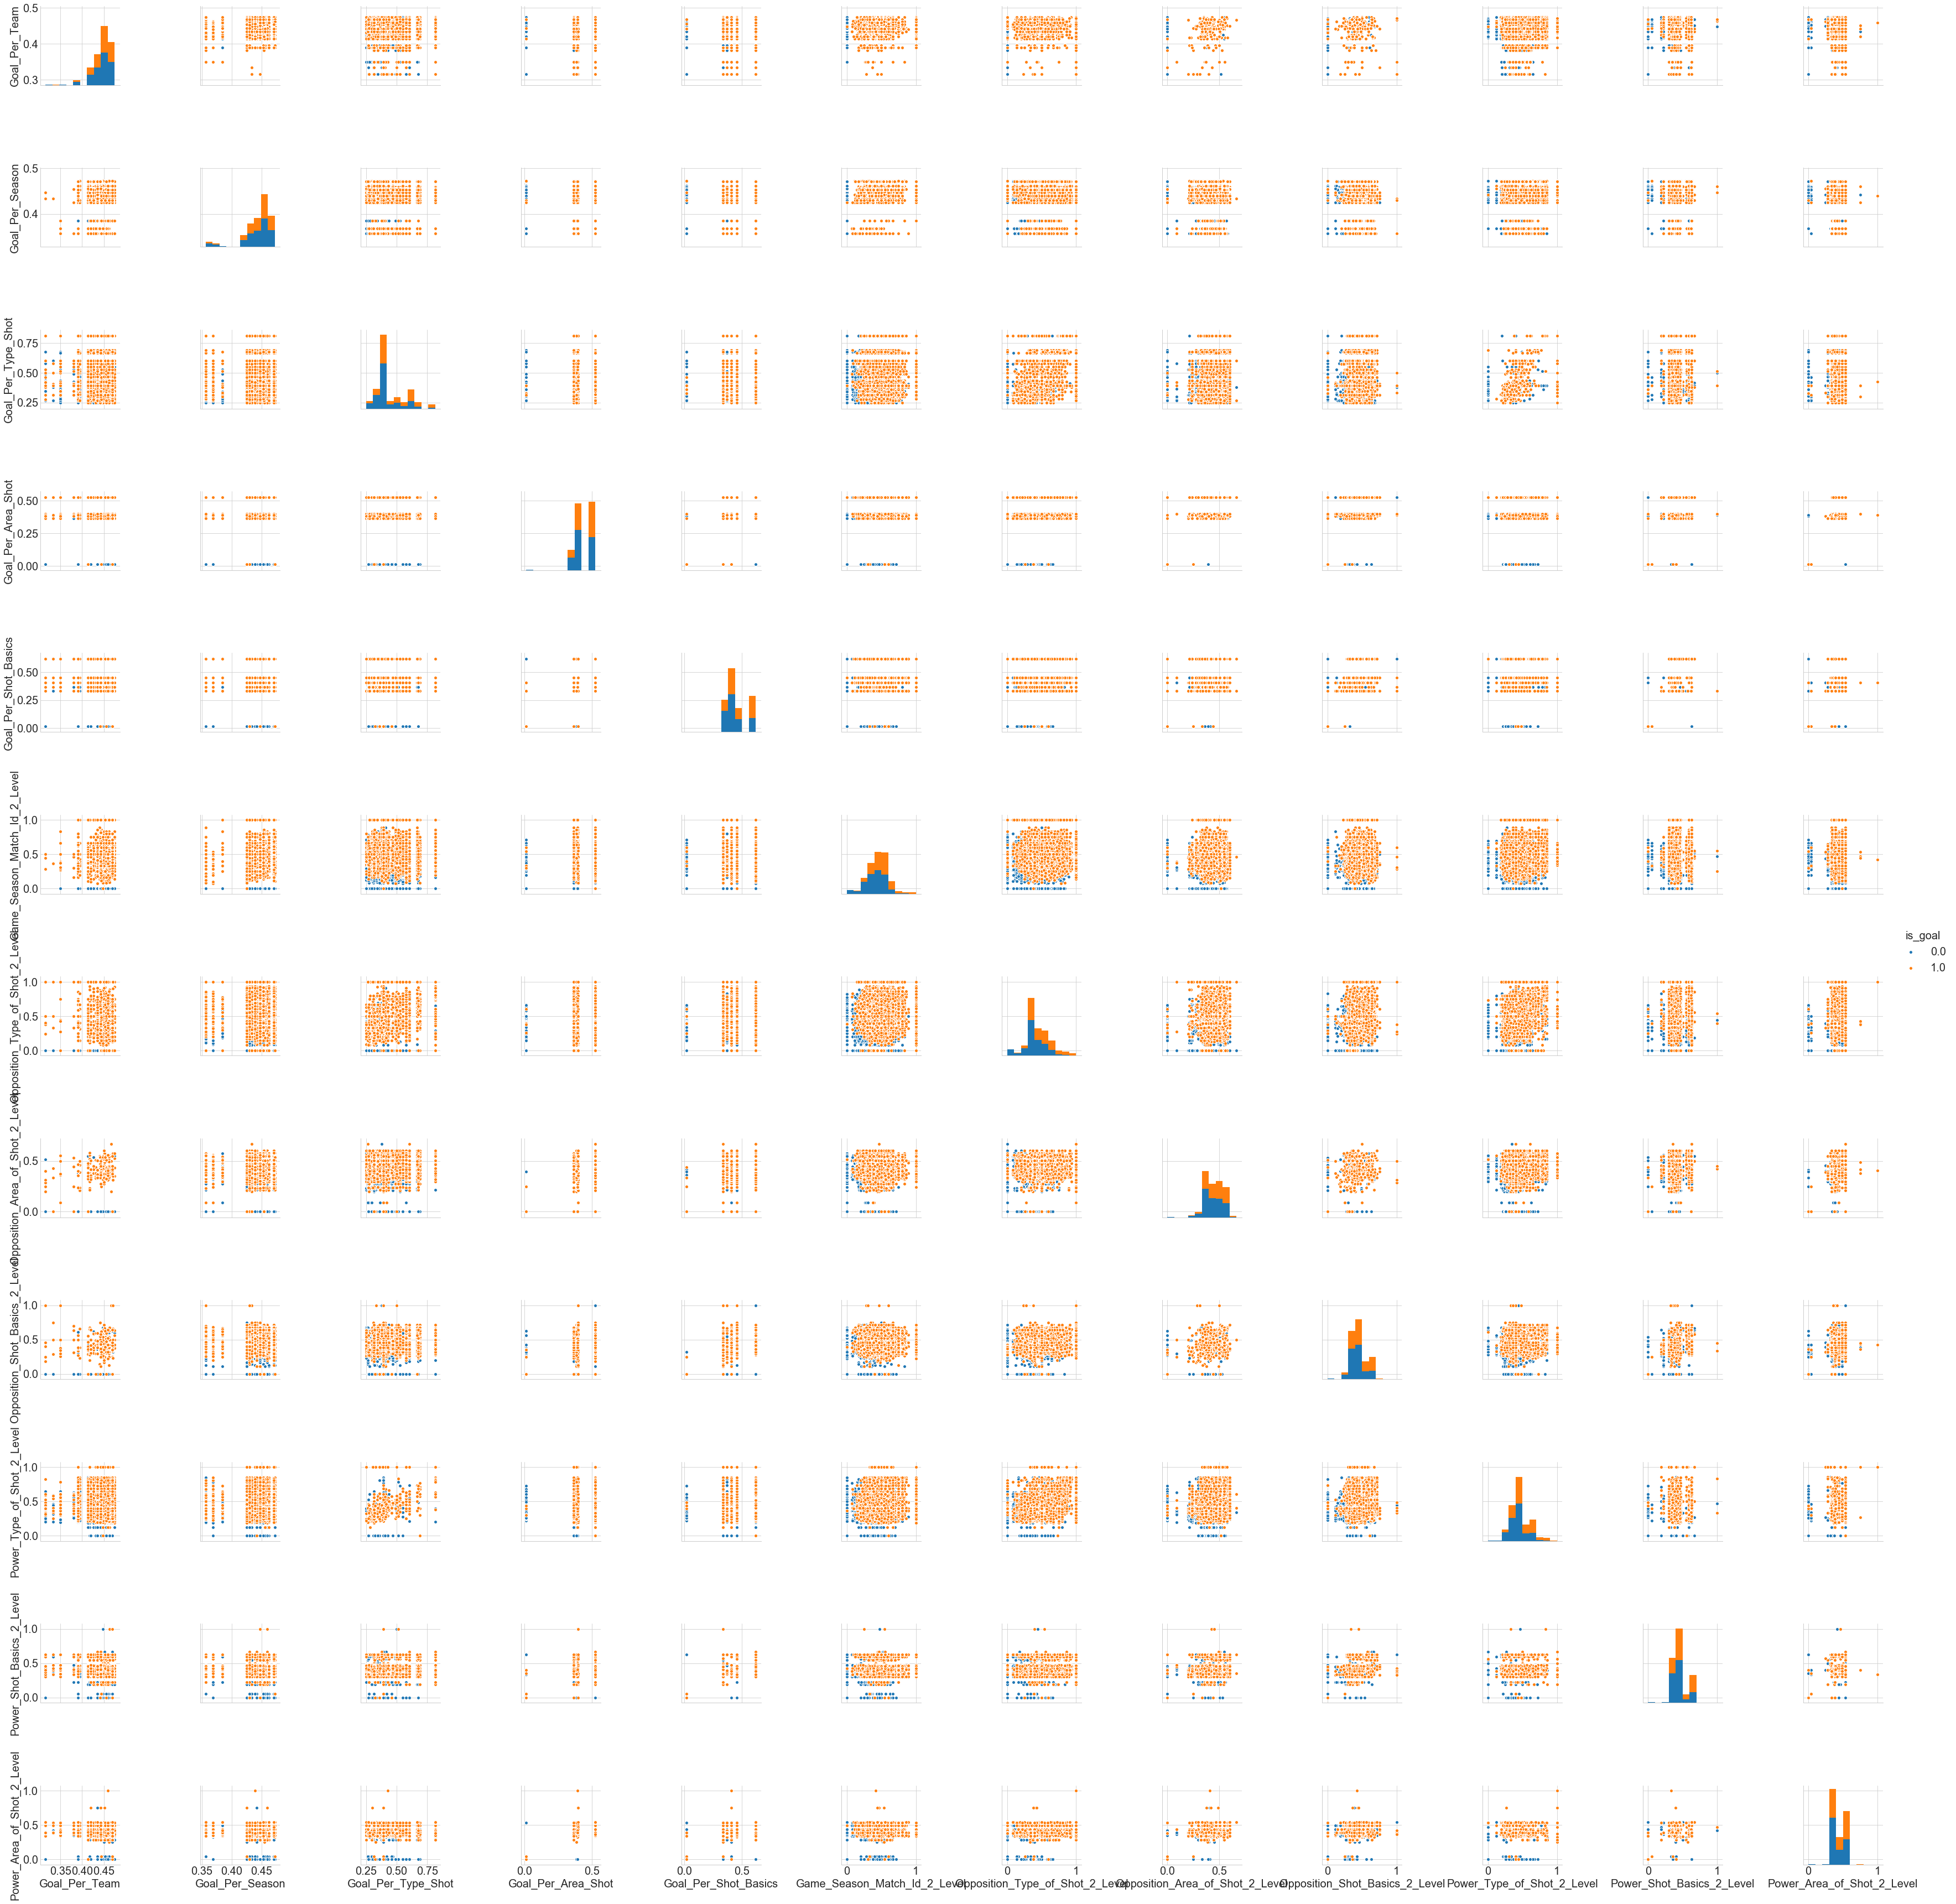

In [741]:
#Pair plots between all the features taken 2 at a time
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(test, hue="is_goal", vars = feature_cols[1:-1]
, size=4)
plt.show()

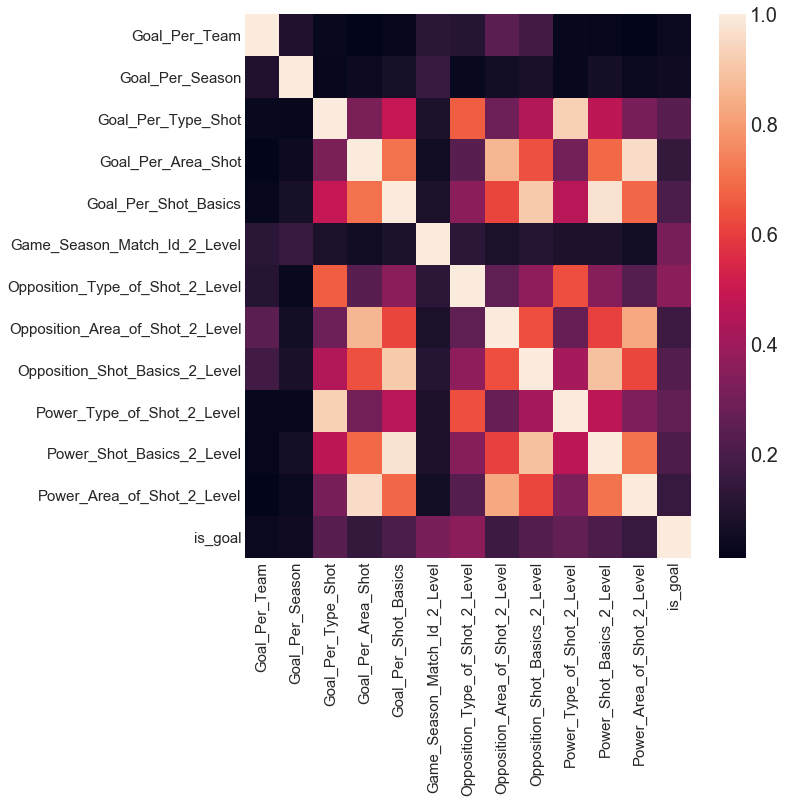

In [742]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 20
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(ronaldo_data_train[feature_cols[1:]].corr())

# Train-Test Split

In [59]:
ronaldo_data_test = ronaldo_data_preprocessed[ronaldo_data_preprocessed.is_goal.isna()]
ronaldo_data_train = ronaldo_data_preprocessed[~ronaldo_data_preprocessed.is_goal.isna()] 

In [60]:
ronaldo_data_train.shape

(24429, 36)

In [162]:
ronaldo_data_test.shape

(6268, 36)

**Forward Feature selection**

In [50]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [66]:
feature_cols[1:-1]

['Goal_Per_Team',
 'Goal_Per_Season',
 'Goal_Per_Type_Shot',
 'Goal_Per_Area_Shot',
 'Goal_Per_Shot_Basics',
 'Game_Season_Match_Id_2_Level',
 'Opposition_Type_of_Shot_2_Level',
 'Opposition_Area_of_Shot_2_Level',
 'Opposition_Shot_Basics_2_Level',
 'Power_Type_of_Shot_2_Level',
 'Power_Shot_Basics_2_Level',
 'Power_Area_of_Shot_2_Level',
 'range_of_shot_encoded',
 'Remaining_Time',
 'location_x',
 'location_y']

In [171]:
sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(ronaldo_data_train[feature_cols[1:-1]].fillna(method='ffill')), ronaldo_data_train[feature_cols[-1]])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\prakhar.raj.HIGHRADIUS\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prakhar.raj.HIGHRADIUS\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prakhar.raj.HIGHRADIUS\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s
C:\Users\prakhar.raj.HIGHRADIUS\AppData\R

In [170]:
# selected_feat= ronaldo_data_train[feature_cols[1:-1]].columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['Game_Season_Match_Id_2_Level', 'Opposition_Type_of_Shot_2_Level',
       'Power_Shot_Basics_2_Level', 'Remaining_Time', 'location_x'],
      dtype='object')

In [169]:
type(selected_feat)

pandas.core.indexes.base.Index

In [325]:
import warnings
warnings.filterwarnings("ignore")
sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features=4, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3)

sfs1 = sfs1.fit(np.array(ronaldo_data_train[feature_cols[1:-1]].fillna(method='ffill')), ronaldo_data_train[feature_cols[-1]])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   10.8s finished

[2019-07-22 00:49:31] Features: 1/4 -- score: 0.6354741574492148[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   12.4s finished

[2019-07-22 00:49:43] Features: 2/4 -- score: 0.6345740509791554[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   14.2s finished

[2019-07-22 00:49:57] Features: 3/4 -- score: 0.642843288819195[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [326]:
selected_feat= ronaldo_data_train[feature_cols[1:-1]].columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['Game_Season_Match_Id_2_Level', 'Opposition_Type_of_Shot_2_Level',
       'Power_Shot_Basics_2_Level', 'location_y'],
      dtype='object')

In [327]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    from sklearn.metrics import confusion_matrix,classification_report
    
    print('Test set')
    pred = rf.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    #print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [328]:
0.7546663088313766
0.7550074183346621
0.7553298711326142
0.755399792666023

0.7553298711326142

In [329]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat].fillna(method='ffill'),
                  X_validation[selected_feat].fillna(method='ffill'),
                  y_train, y_validation)

Train set
Random Forests roc-auc: 0.755399792666023
Test set
[[2189  482]
 [1058 1157]]
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.74      2671
         1.0       0.71      0.52      0.60      2215

    accuracy                           0.68      4886
   macro avg       0.69      0.67      0.67      4886
weighted avg       0.69      0.68      0.68      4886



In [330]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs1 = EFS(RandomForestClassifier(n_jobs=4, random_state=0), 
           min_features=1,
           max_features=4, 
           scoring='accuracy',
           print_progress=True,
           cv=3)

efs1 = efs1.fit(np.array(ronaldo_data_train[feature_cols[1:-1]].fillna(method='ffill')), ronaldo_data_train[feature_cols[-1]])

KeyboardInterrupt: 

In [ ]:
selected_feat_efs= ronaldo_data_train.columns[list(efs1.best_idx_)]
selected_feat_efs

In [ ]:
#Splitting Train further into Train and validation

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(ronaldo_data_train[feature_cols[1:-1]].fillna(method='ffill'), ronaldo_data_train[feature_cols[-1]], test_size=0.2, random_state=42)

In [320]:
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

(19543, 16) (19543,)
(4886, 16) (4886,)


In [321]:
X_train = X_train[selected_feat].fillna(method='ffill')
X_validation = X_validation[selected_feat].fillna(method='ffill')


In [178]:
ronaldo_data_test = ronaldo_data_test.reset_index()

In [260]:
#Final_Submission
X_train = ronaldo_data_train[selected_feat].fillna(method='ffill')
y_train = ronaldo_data_train[feature_cols[-1]]

In [261]:
print(X_train.shape, y_train.shape)

(24429, 8) (24429,)


In [262]:
X_test = ronaldo_data_test[selected_feat].fillna(0)

In [263]:
print(X_test.shape)

(6268, 8)


**Modelling**

In [202]:
from sklearn.metrics import confusion_matrix,classification_report

In [266]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear', C=2)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob_logistic = clf.predict_proba(X_test)
# print(confusion_matrix(y_validation, pred))
# print(classification_report(y_validation, pred))
# accuracy = accuracy_score(y_validation, pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [267]:
pred_prob_logistic[:,0]

array([0.83025556, 0.53394424, 0.38379411, ..., 0.76525749, 0.94353558,
       0.69692321])

In [277]:
X_test['is_goal'] = pd.Series(pred_prob[:,0])

In [237]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='liblinear', C=2)
clf.fit(X_train, y_train)
pred = clf.predict(X_validation)
pred_prob = clf.predict_proba(X_validation)
print(confusion_matrix(y_validation, pred))
print(classification_report(y_validation, pred))
accuracy = accuracy_score(y_validation, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[2103  568]
 [ 932 1283]]
              precision    recall  f1-score   support

         0.0       0.69      0.79      0.74      2671
         1.0       0.69      0.58      0.63      2215

    accuracy                           0.69      4886
   macro avg       0.69      0.68      0.68      4886
weighted avg       0.69      0.69      0.69      4886

Accuracy: 69.30%


In [268]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(max_depth=3,learning_rate=0.02,n_estimators=500,gamma=0.5,)
model.fit(X_train, y_train)
# make predictions for test data
# y_pred = model.predict(X_validation)
pred_prob_XGB = model.predict_proba(X_test)

# predictions = [round(value) for value in y_pred]
# evaluate predictions
# accuracy = accuracy_score(y_validation, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))
# print(confusion_matrix(y_validation, y_pred))
# print(classification_report(y_validation, y_pred))

In [137]:
def run_randomForests(X_train, X_test, y_train, y_test):
    
    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    from sklearn.metrics import confusion_matrix,classification_report
    
    print('Test set')
    pred = rf.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [239]:
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

Accuracy: 67.44%
[[2235  436]
 [1155 1060]]
              precision    recall  f1-score   support

         0.0       0.66      0.84      0.74      2671
         1.0       0.71      0.48      0.57      2215

    accuracy                           0.67      4886
   macro avg       0.68      0.66      0.65      4886
weighted avg       0.68      0.67      0.66      4886



In [214]:
######################Submission

In [216]:
ronaldo_data_test.shot_id_number

0           1
1           8
2          17
3          20
4          22
        ...  
6263    30682
6264    30683
6265    30687
6266    30688
6267    30694
Name: shot_id_number, Length: 6268, dtype: int64

In [217]:
X_test['shot_id_number'] = ronaldo_data_test.shot_id_number

In [220]:
Submit = X_test[['shot_id_number', 'is_goal']]

In [221]:
Submit.to_csv(r'C:\Users\prakhar.raj.HIGHRADIUS\Desktop\MyWork_DataScience\ZS_Challenge\Cristano_Ronaldo_Final_v1\prakhar_raj_06031998_prediction_1.csv', index=False)

In [248]:
x=pd.DataFrame(pred_prob[:,1],y_pred_xgb[:,1])

In [244]:
y_pred_xgb = model.predict_proba(X_validation)


In [250]:
x.reset_index(inplace=True)

In [252]:
x['final']=x.sum(axis=1)

In [254]:
x['final']=x['final']/2

In [258]:
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print(confusion_matrix(x['final'].tolist(), y_pred))
# print(classification_report(x['final'].tolist(), y_pred))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_validation,x['final'].tolist())))


Random Forests roc-auc: 0.7694576730420291


In [269]:
pred_prob_XGB[:,0]

array([0.8868892 , 0.52579534, 0.425902  , ..., 0.97808397, 0.9494188 ,
       0.70109665], dtype=float32)

In [270]:
pred_prob_logistic[:,0]

array([0.83025556, 0.53394424, 0.38379411, ..., 0.76525749, 0.94353558,
       0.69692321])

In [273]:
x=pd.DataFrame(pred_prob_XGB[:,0],pred_prob_logistic[:,0])
x.reset_index(inplace=True)
x['final']=x.sum(axis=1)
x['final']=x['final']/2

predddd=x['final'].tolist()

In [275]:
len(predddd)

6268

In [279]:
X_test.is_goal = pd.Series(predddd)

In [283]:
X_test.head()

,Goal_Per_Season,Goal_Per_Type_Shot,Goal_Per_Shot_Basics,Game_Season_Match_Id_2_Level,Opposition_Type_of_Shot_2_Level,Power_Shot_Basics_2_Level,location_x,location_y,is_goal,shot_id_number
0,0.462046,0.275000,0.406092,0.444444,0.125000,0.427982,167.0,72.0,0.858572,1
1,0.462046,0.392126,0.618073,0.444444,0.392936,0.628161,1.0,28.0,0.529870,8
2,0.462046,0.602530,0.618073,0.388889,0.608000,0.626928,0.0,0.0,0.404848,17
3,0.462046,0.602530,0.000000,0.388889,0.608000,0.000000,0.0,0.0,0.622444,20
4,0.462046,0.460993,0.406092,0.388889,0.500000,0.407631,134.0,127.0,0.593313,22


In [282]:
X_test['shot_id_number'] = ronaldo_data_test.shot_id_number

In [285]:
Submit = X_test[['shot_id_number', 'is_goal']]

In [287]:
Submit.shape

(6268, 2)